In [1]:
import pandas as pd
from sqlalchemy import create_engine

host = 'xxxxxxxxxxxx'
port = '5432'
username = 'xxxxxxxx'
password = 'xxxxxxxx'
database = 'xxxxxxxx'

connection_url = f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}'
engine = create_engine(connection_url)

query = 'SELECT * FROM "yt-videos"'
df = pd.read_sql(query, engine)

In [2]:
df

,video_id,video_title,upload_date,view_count,like_count,dislike_count,comment_count,days_since_upload
0,hKX20xIvJVI,About Data Analyst Bootcamp 3.0..,2024-06-30,5741,225,0,59,1.0
1,Ef7diyQvIw4,Data Analyst Bootcamp 3.0!,2024-06-27,4731,269,0,24,4.0
2,-wcIpVNKS2A,Order to learn PowerBI basics!,2024-06-26,3762,244,0,5,5.0
3,dXjlWwWYR0M,𝐀 𝐬𝐢𝐠𝐧𝐢𝐟𝐢𝐜𝐚𝐧𝐭 𝐮𝐩𝐝𝐚𝐭𝐞 𝐢𝐬 𝐜𝐨𝐦𝐢𝐧𝐠 𝐬𝐨𝐨𝐧...!,2024-06-25,5010,130,0,15,6.0
4,x8ygwTm1CRw,Breaking Age Barriers!,2024-06-24,7496,173,0,5,7.0
...,...,...,...,...,...,...,...,...
12883,9WHg9y10mio,What is the Right Career Path - DataMites Data...,2019-07-11,787,5,0,0,NaN
12884,acJcy2dgA1A,What is the Best Career Job in 2020 - Data Sci...,2019-07-11,251,3,0,0,NaN
12885,Lf5ENUlD6iw,Want to Soar to High - Switch to Data Science ...,2019-07-11,91,2,0,0,NaN
12886,bhEHRJJ5nuU,Dr.Beena Data Science Success Story - DataMite...,2019-07-04,13271,48,0,1,NaN


In [3]:
df.drop('dislike_count', inplace=True, axis=1)
df.drop('video_id', inplace=True, axis=1)

In [4]:
df.isnull().sum()

video_title              0
upload_date              0
view_count               0
like_count               0
comment_count            0
days_since_upload    12388
dtype: int64

In [5]:
from datetime import datetime

df['upload_date'] = pd.to_datetime(df['upload_date'])
df['days_since_upload'] = (datetime.now() - df['upload_date']).dt.days
df

,video_title,upload_date,view_count,like_count,comment_count,days_since_upload
0,About Data Analyst Bootcamp 3.0..,2024-06-30,5741,225,59,18
1,Data Analyst Bootcamp 3.0!,2024-06-27,4731,269,24,21
2,Order to learn PowerBI basics!,2024-06-26,3762,244,5,22
3,𝐀 𝐬𝐢𝐠𝐧𝐢𝐟𝐢𝐜𝐚𝐧𝐭 𝐮𝐩𝐝𝐚𝐭𝐞 𝐢𝐬 𝐜𝐨𝐦𝐢𝐧𝐠 𝐬𝐨𝐨𝐧...!,2024-06-25,5010,130,15,23
4,Breaking Age Barriers!,2024-06-24,7496,173,5,24
...,...,...,...,...,...,...
12883,What is the Right Career Path - DataMites Data...,2019-07-11,787,5,0,1834
12884,What is the Best Career Job in 2020 - Data Sci...,2019-07-11,251,3,0,1834
12885,Want to Soar to High - Switch to Data Science ...,2019-07-11,91,2,0,1834
12886,Dr.Beena Data Science Success Story - DataMite...,2019-07-04,13271,48,1,1841


In [6]:
df.isnull().sum()

video_title          0
upload_date          0
view_count           0
like_count           0
comment_count        0
days_since_upload    0
dtype: int64

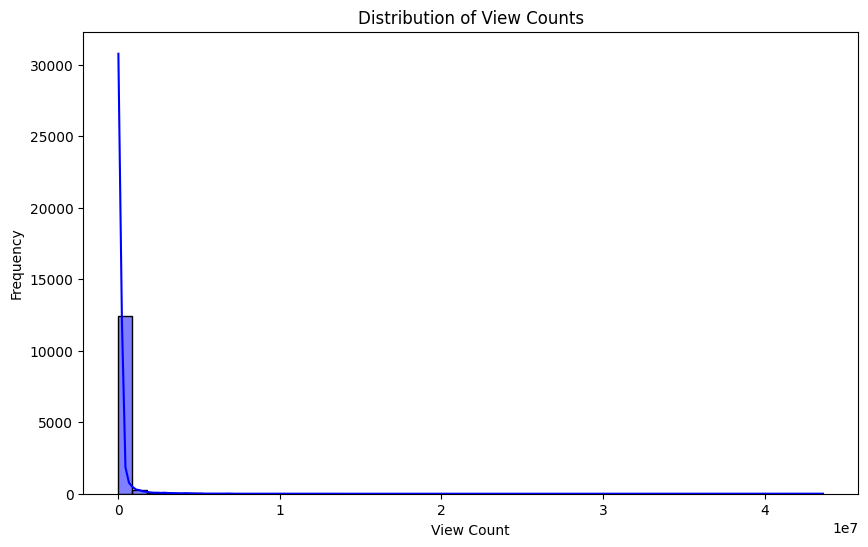

In [7]:
# Plot 1: Distribution of View Counts

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['view_count'], bins=50, kde=True, color='blue')
plt.title('Distribution of View Counts')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.show()

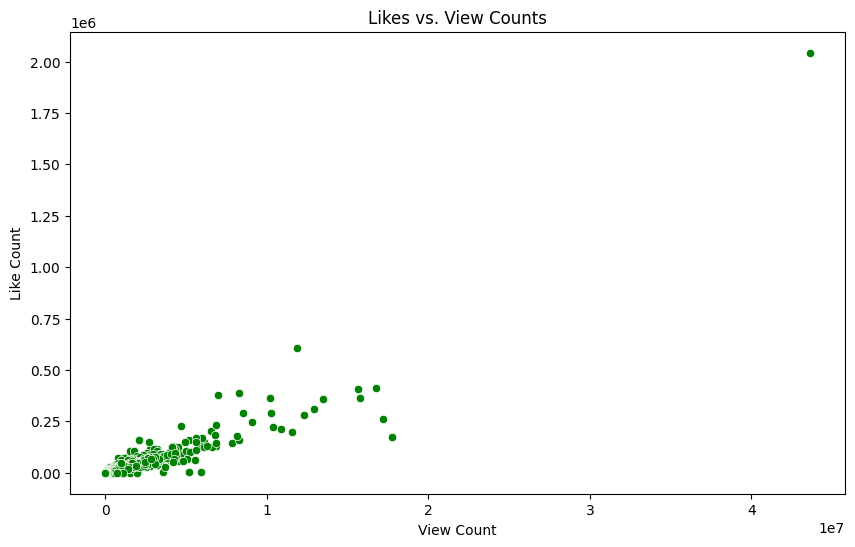

In [8]:
# Plot 2: Relationship between Likes and Views

plt.figure(figsize=(10, 6))
sns.scatterplot(x='view_count', y='like_count', data=df, color='green')
plt.title('Likes vs. View Counts')
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.show()

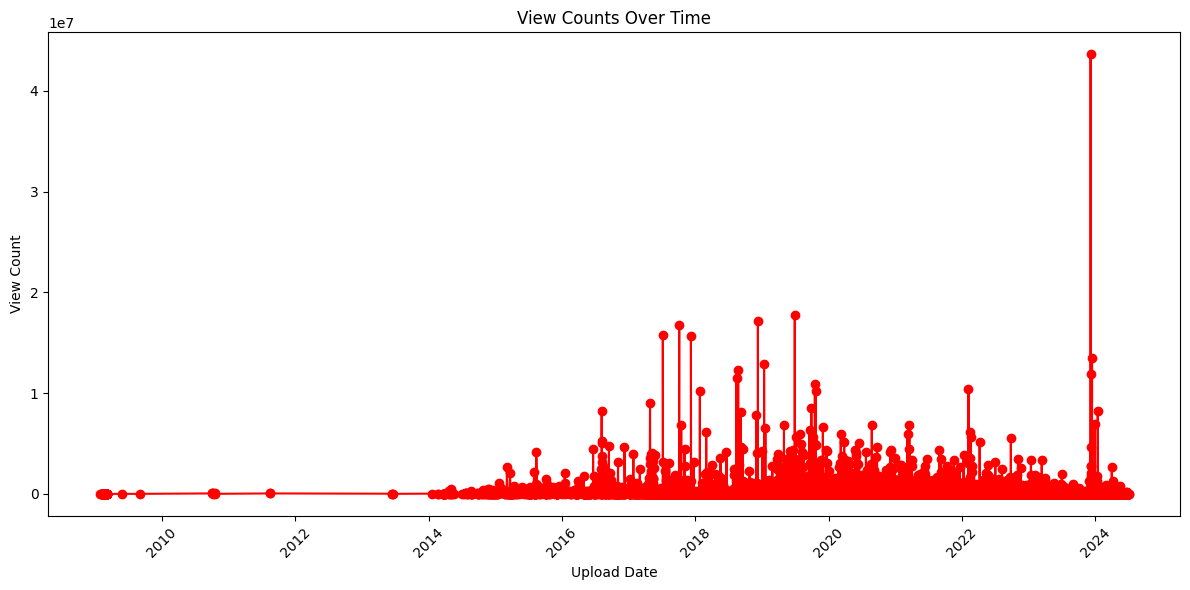

In [9]:
# Plot 3: Line Plot of View Counts Over Time

df = df.sort_values('upload_date')

plt.figure(figsize=(12, 6))
plt.plot(df['upload_date'], df['view_count'], marker='o', linestyle='-', color='red')
plt.title('View Counts Over Time')
plt.xlabel('Upload Date')
plt.ylabel('View Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

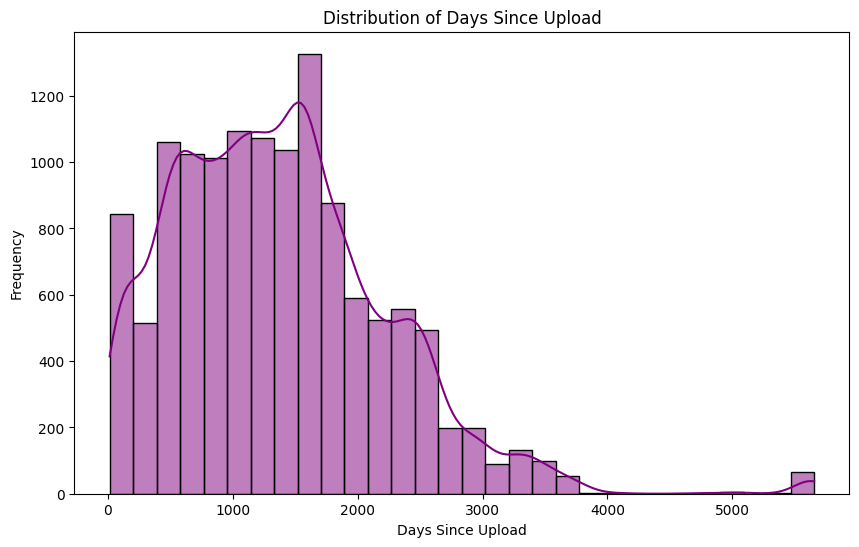

In [10]:
# Plot 4: Distribution of Days Since Upload

plt.figure(figsize=(10, 6))
sns.histplot(df['days_since_upload'], bins=30, kde=True, color='purple')
plt.title('Distribution of Days Since Upload')
plt.xlabel('Days Since Upload')
plt.ylabel('Frequency')
plt.show()

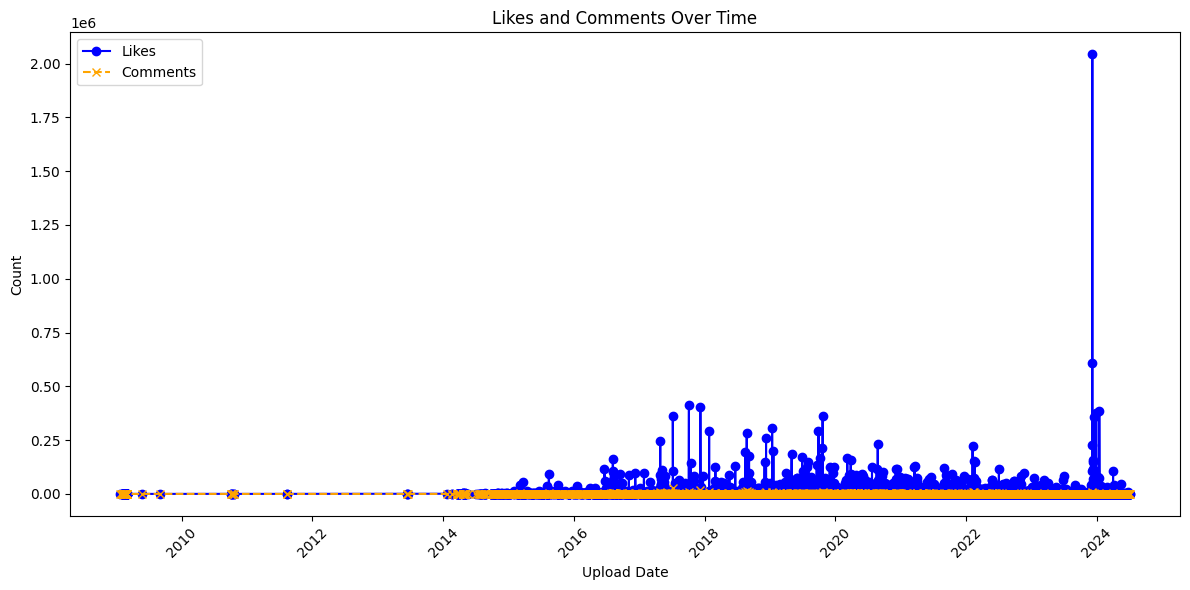

In [11]:
# Plot 5: Likes and Comments Over Time

plt.figure(figsize=(12, 6))
plt.plot(df['upload_date'], df['like_count'], label='Likes', marker='o', linestyle='-', color='blue')
plt.plot(df['upload_date'], df['comment_count'], label='Comments', marker='x', linestyle='--', color='orange')
plt.title('Likes and Comments Over Time')
plt.xlabel('Upload Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

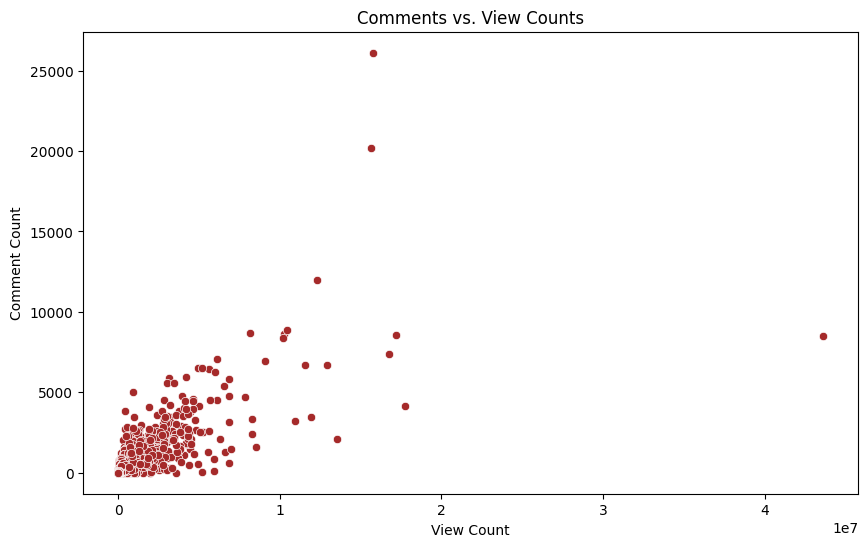

In [12]:
# Plot 6: Scatter Plot of Comments vs. Views

plt.figure(figsize=(10, 6))
sns.scatterplot(x='view_count', y='comment_count', data=df, color='brown')
plt.title('Comments vs. View Counts')
plt.xlabel('View Count')
plt.ylabel('Comment Count')
plt.show()

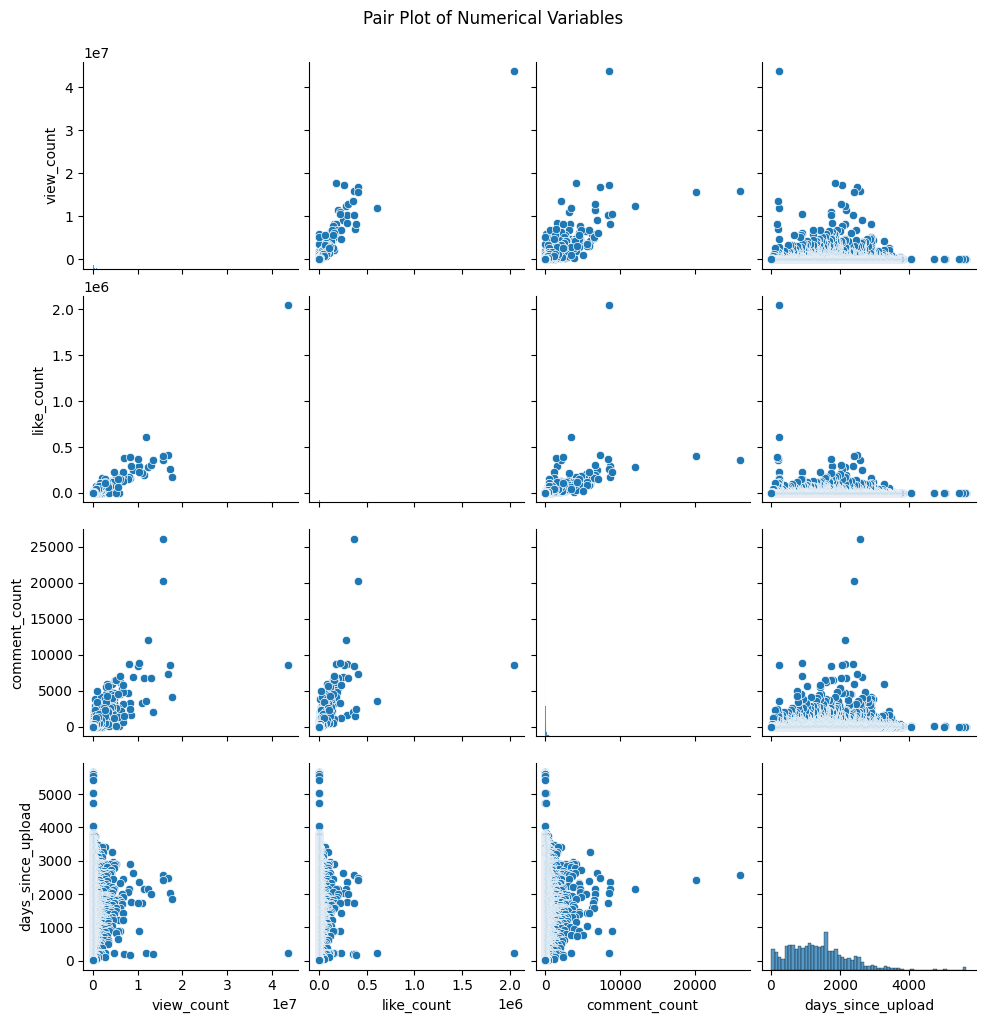

In [13]:
# Plot 7: Pair Plot of Numerical Variables

sns.pairplot(df[['view_count', 'like_count', 'comment_count', 'days_since_upload']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

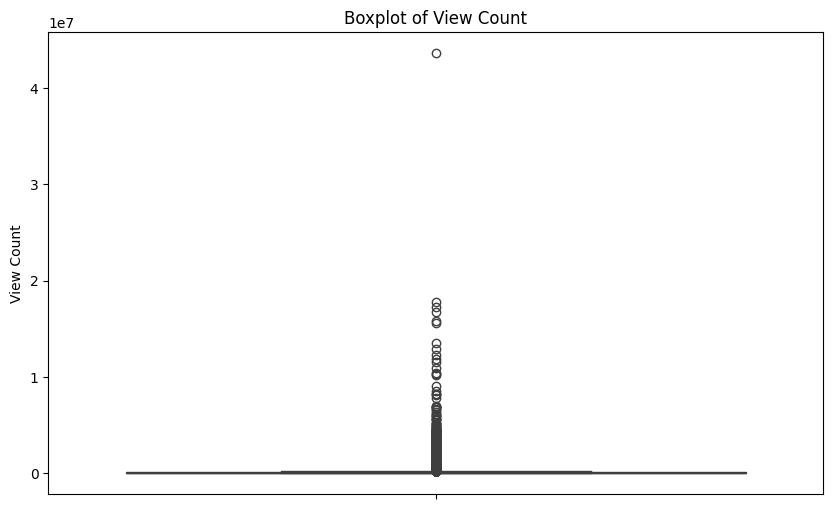

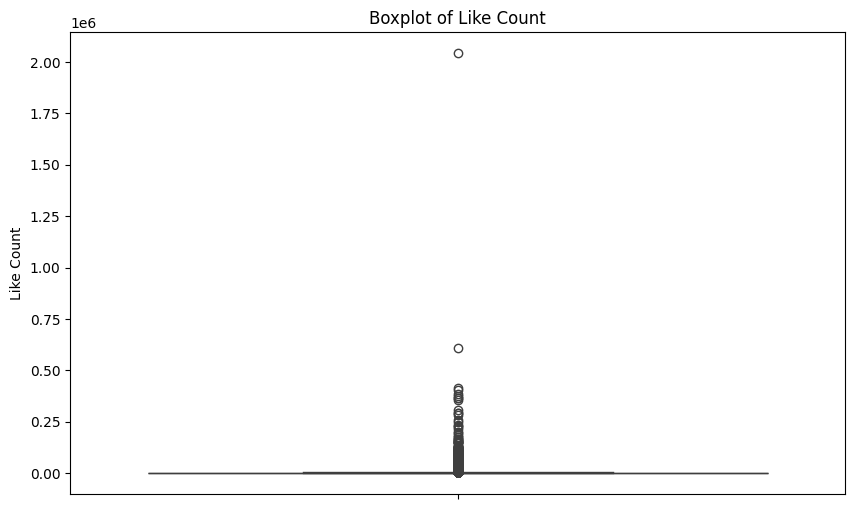

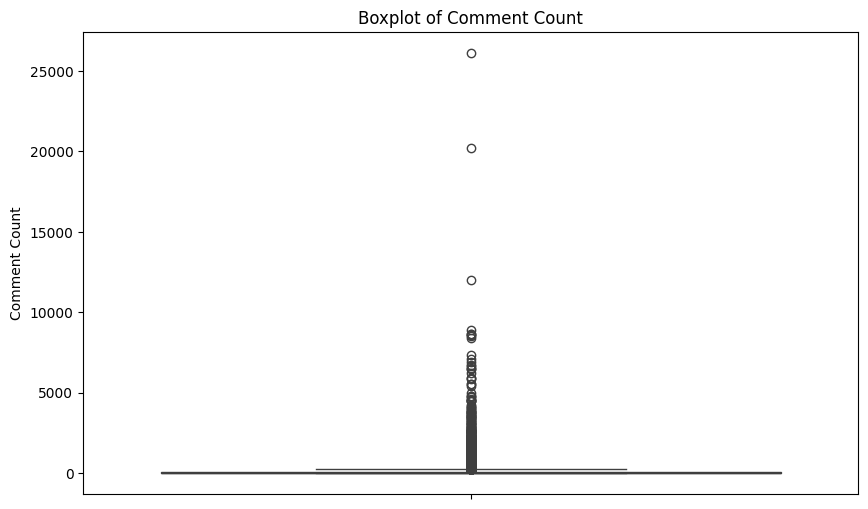

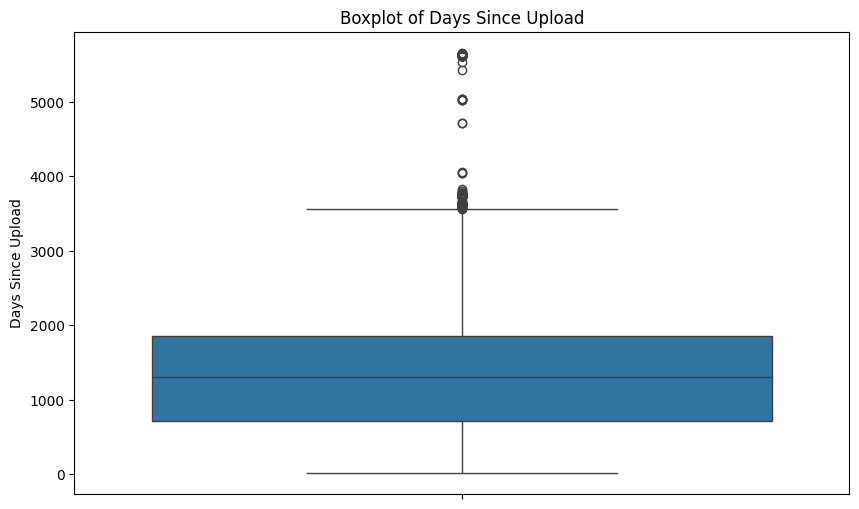

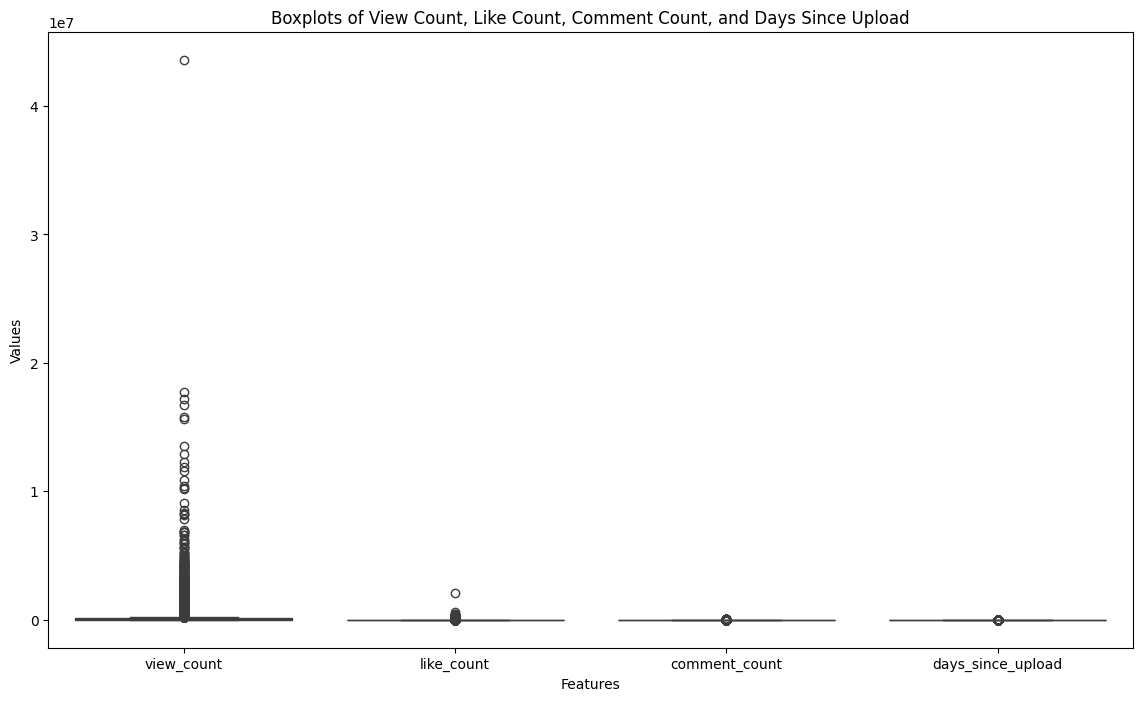

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='view_count')
plt.title('Boxplot of View Count')
plt.ylabel('View Count')
plt.show()

# Boxplot for like_count
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='like_count')
plt.title('Boxplot of Like Count')
plt.ylabel('Like Count')
plt.show()

# Boxplot for comment_count
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='comment_count')
plt.title('Boxplot of Comment Count')
plt.ylabel('Comment Count')
plt.show()

# Boxplot for days_since_upload
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='days_since_upload')
plt.title('Boxplot of Days Since Upload')
plt.ylabel('Days Since Upload')
plt.show()

# Boxplots for multiple features
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[['view_count', 'like_count', 'comment_count', 'days_since_upload']])
plt.title('Boxplots of View Count, Like Count, Comment Count, and Days Since Upload')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

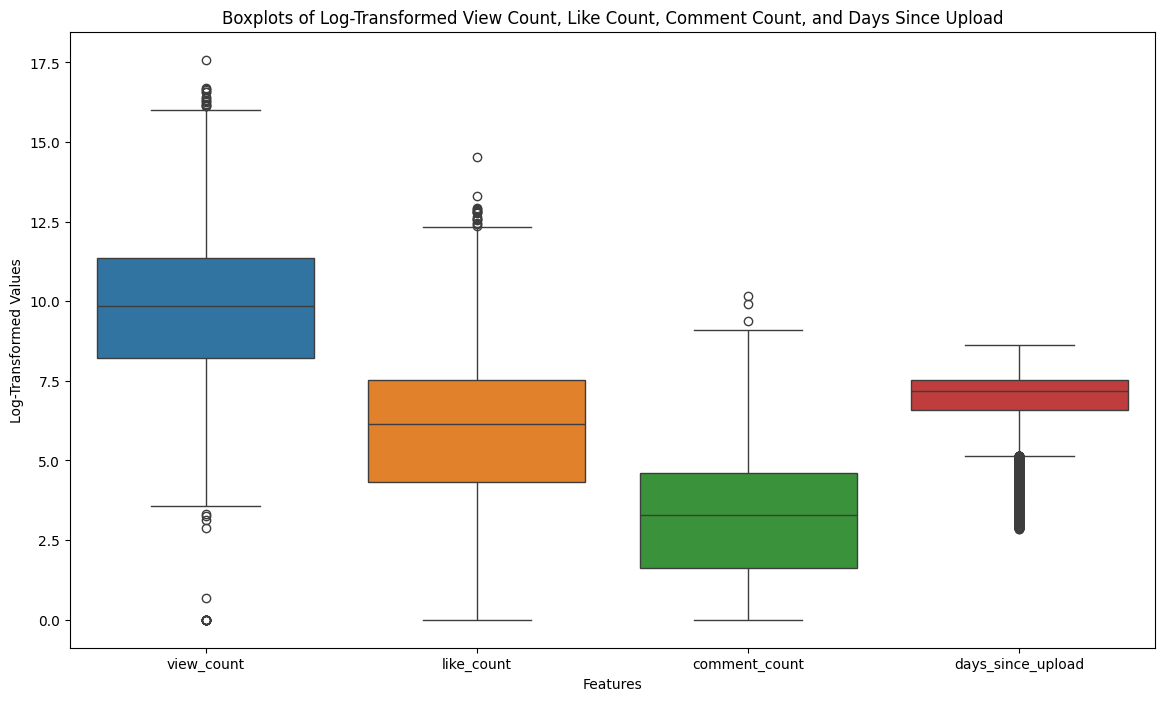

In [15]:
import numpy as np

df_log_transformed = df.copy()
for col in ['view_count', 'like_count', 'comment_count', 'days_since_upload']:
    df_log_transformed[col] = np.log1p(df[col])

# Data visualization with logarithmic transformation
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_log_transformed[['view_count', 'like_count', 'comment_count', 'days_since_upload']])
plt.title('Boxplots of Log-Transformed View Count, Like Count, Comment Count, and Days Since Upload')
plt.xlabel('Features')
plt.ylabel('Log-Transformed Values')
plt.show()

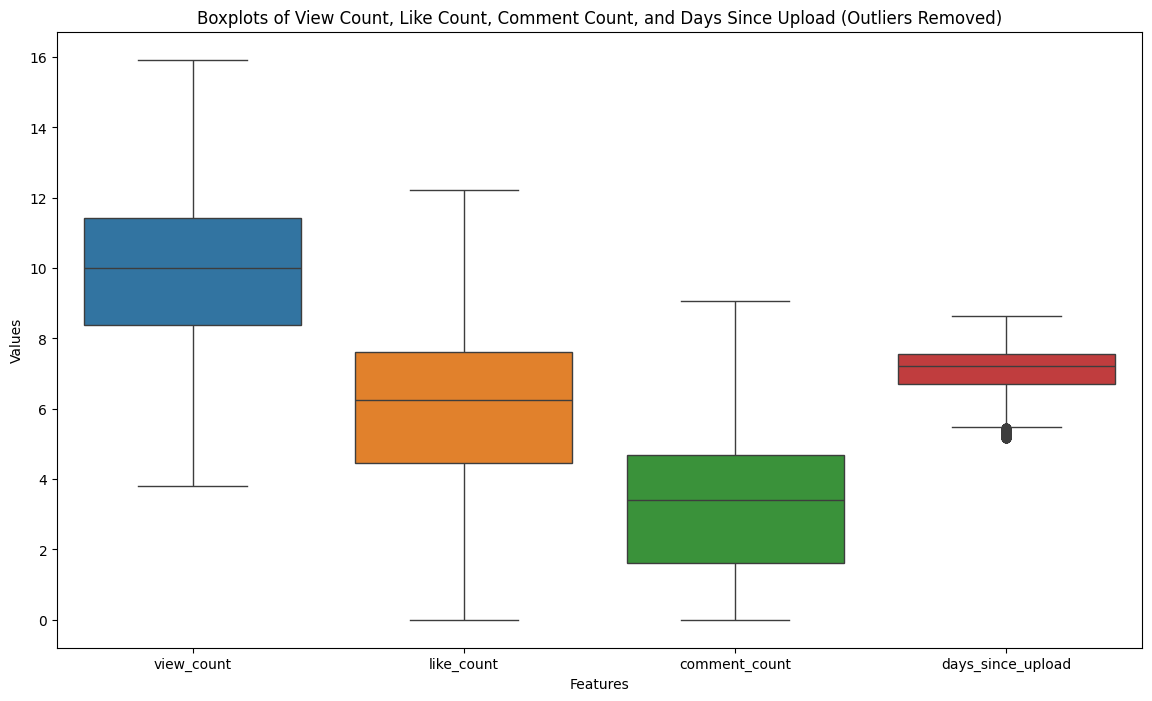

In [16]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from each column
df_clean = df_log_transformed.copy()
for col in ['view_count', 'like_count', 'comment_count', 'days_since_upload']:
    df_clean = remove_outliers(df_clean, col)

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_clean[['view_count', 'like_count', 'comment_count', 'days_since_upload']])
plt.title('Boxplots of View Count, Like Count, Comment Count, and Days Since Upload (Outliers Removed)')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [17]:
df_clean

,video_title,upload_date,view_count,like_count,comment_count,days_since_upload
11888,Introduction to Neural Networks for Java(Class...,2009-01-24,9.784648,4.127134,1.791759,8.640295
11887,Introduction to Neural Networks for C#(Class 3...,2009-02-01,9.205428,3.663562,1.386294,8.638880
11885,Introduction to Neural Networks for Java(Class...,2009-02-04,8.545975,3.178054,0.000000,8.638348
11886,Introduction to Neural Networks for Java(Class...,2009-02-04,9.152499,3.258097,1.791759,8.638348
11884,Introduction to Neural Networks for C#(Class 3...,2009-02-04,9.167015,3.332205,1.609438,8.638348
...,...,...,...,...,...,...
67,Data Courses SCAM Exposed | Scam Awareness Cou...,2024-01-26,9.979059,6.416732,4.595120,5.164786
7157,Sigmoid#39;s Role in Neural Networks 🤖 - What ...,2024-01-26,7.074963,3.713572,0.000000,5.164786
10014,Python Classes vs. Rust Structs: What#39;s Dif...,2024-01-27,8.776321,5.337538,2.302585,5.159055
12454,Datamites Alumni Talk : Farjad#39;s Journey as...,2024-01-27,5.817111,2.302585,0.000000,5.159055


In [18]:
df_clean['upload_date'] = pd.to_datetime(df_clean['upload_date'])
df_clean['year'] = df_clean['upload_date'].dt.year
df_clean['month'] = df_clean['upload_date'].dt.month
df_clean['day'] = df_clean['upload_date'].dt.day
df_clean.drop(columns=['upload_date'], inplace=True)

df_clean

,video_title,view_count,like_count,comment_count,days_since_upload,year,month,day
11888,Introduction to Neural Networks for Java(Class...,9.784648,4.127134,1.791759,8.640295,2009,1,24
11887,Introduction to Neural Networks for C#(Class 3...,9.205428,3.663562,1.386294,8.638880,2009,2,1
11885,Introduction to Neural Networks for Java(Class...,8.545975,3.178054,0.000000,8.638348,2009,2,4
11886,Introduction to Neural Networks for Java(Class...,9.152499,3.258097,1.791759,8.638348,2009,2,4
11884,Introduction to Neural Networks for C#(Class 3...,9.167015,3.332205,1.609438,8.638348,2009,2,4
...,...,...,...,...,...,...,...,...
67,Data Courses SCAM Exposed | Scam Awareness Cou...,9.979059,6.416732,4.595120,5.164786,2024,1,26
7157,Sigmoid#39;s Role in Neural Networks 🤖 - What ...,7.074963,3.713572,0.000000,5.164786,2024,1,26
10014,Python Classes vs. Rust Structs: What#39;s Dif...,8.776321,5.337538,2.302585,5.159055,2024,1,27
12454,Datamites Alumni Talk : Farjad#39;s Journey as...,5.817111,2.302585,0.000000,5.159055,2024,1,27


In [19]:
import gensim
from gensim.models import Word2Vec
import nltk
import numpy as np
import pandas as pd
nltk.download('punkt')

df_clean['video_title'] = df_clean['video_title'].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
df_clean['video_title'] = df_clean['video_title'].apply(nltk.word_tokenize)

# Trainng the Word2Vec model
model = Word2Vec(sentences=df_clean['video_title'], vector_size=100, window=5, min_count=1, workers=4)

# Function for obtaining the average header
def get_average_word2vec(tokens, model, vector_size):
    vector = np.zeros(vector_size)
    count = 0
    for token in tokens:
        if token in model.wv:
            vector += model.wv[token]
            count += 1
    if count > 0:
        vector /= count
    return vector

# Getting vectors for each header
vector_size = 100
embeddings = df_clean['video_title'].apply(lambda x: get_average_word2vec(x, model, vector_size))

# Splitting vectors into separete columns
embedding_df = pd.DataFrame(embeddings.tolist(), index= df_clean.index)

# Adding columns with vectors to the main DataFrame
df_clean = pd.concat([df_clean, embedding_df], axis=1)

# Deleting the column 'video_title' with tokens
df_clean = df_clean.drop('video_title', axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
df_clean

,view_count,like_count,comment_count,days_since_upload,year,month,day,0,1,2,...,90,91,92,93,94,95,96,97,98,99
11888,9.784648,4.127134,1.791759,8.640295,2009,1,24,-0.258800,0.778356,-0.259804,...,0.321324,0.379724,-0.926497,0.337672,1.105954,0.307331,0.843441,-0.149163,0.507401,-0.430528
11887,9.205428,3.663562,1.386294,8.638880,2009,2,1,-0.251765,0.880124,-0.354430,...,0.362270,0.433494,-1.036382,0.387581,1.283684,0.398259,0.970383,-0.174702,0.646071,-0.537926
11885,8.545975,3.178054,0.000000,8.638348,2009,2,4,-0.290944,0.874545,-0.292410,...,0.354927,0.425492,-1.041087,0.376852,1.237117,0.343637,0.945170,-0.165196,0.571978,-0.484837
11886,9.152499,3.258097,1.791759,8.638348,2009,2,4,-0.292965,0.878649,-0.296035,...,0.360026,0.427777,-1.045405,0.381686,1.249481,0.345722,0.953162,-0.168782,0.576658,-0.486586
11884,9.167015,3.332205,1.609438,8.638348,2009,2,4,-0.224524,0.784482,-0.315144,...,0.324380,0.387139,-0.920953,0.346526,1.145780,0.354431,0.865933,-0.155845,0.576358,-0.480671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,9.979059,6.416732,4.595120,5.164786,2024,1,26,-0.286452,0.237654,-0.220252,...,0.469832,0.254660,-0.097998,0.240053,0.833795,0.245214,0.526518,-0.284931,0.264406,-0.223178
7157,7.074963,3.713572,0.000000,5.164786,2024,1,26,0.086500,0.392518,-0.383138,...,0.401258,0.259328,-0.342692,0.282652,0.909421,0.518126,0.508013,-0.149911,0.613724,-0.490204
10014,8.776321,5.337538,2.302585,5.159055,2024,1,27,0.088239,0.380011,-0.339432,...,0.520028,0.242678,-0.144538,0.291817,1.030949,0.524218,0.526193,-0.152684,0.519489,-0.491715
12454,5.817111,2.302585,0.000000,5.159055,2024,1,27,-0.007240,0.390120,-0.273268,...,0.544957,0.198897,-0.113367,0.337419,0.868699,0.412999,0.500329,-0.120757,0.516130,-0.319601


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import numpy as np

# Splitting data into independent and dependent variables
X_views = df_clean.drop('view_count', axis=1)
y_views = df_clean['view_count']

# Splitting data into training and test samples
X_train_views, X_test_views, y_train_views, y_test_views = train_test_split(X_views, y_views, test_size=0.2, random_state=42)

# Model creation and training
model_views = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1)
model_views.fit(X_train_views, y_train_views)

# Predictions on test data
predictions_views = model_views.predict(X_test_views)

# Evaluation of the model
mse_views = mean_squared_error(y_test_views, predictions_views)
mae_views = mean_absolute_error(y_test_views, predictions_views)
rmse_views = np.sqrt(mse_views)
r2_views = r2_score(y_test_views, predictions_views)

# Output the results
print(f'MSE: {mse_views}')
print(f'MAE: {mae_views}')
print(f'RMSE: {rmse_views}')
print(f'R-squared: {r2_views}')

MSE: 0.2503614445288233
MAE: 0.3286098056089632
RMSE: 0.5003613139810305
R-squared: 0.9440297650626439


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Setting up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

# GridSearchCV setup
grid_search = GridSearchCV(estimator=model_views, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_views, y_train_views)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Using the best parameters to train the model
best_model_views = xgb.XGBRegressor(**best_params)
best_model_views.fit(X_train_views, y_train_views)

# Predictions on test data
predictions_views = best_model_views.predict(X_test_views)

# Evaluation of the model
mse_views = mean_squared_error(y_test_views, predictions_views)
mae_views = mean_absolute_error(y_test_views, predictions_views)
rmse_views = np.sqrt(mse_views)
r2_views = r2_score(y_test_views, predictions_views)

# Output the results
print(f'MSE: {mse_views}')
print(f'MAE: {mae_views}')
print(f'RMSE: {rmse_views}')
print(f'R-squared: {r2_views}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150}
MSE: 0.2472548729493042
MAE: 0.3265697554329467
RMSE: 0.4972472955676121
R-squared: 0.9447242631371483


In [23]:
import pickle
with open('video_popularity_prediction.pickle','wb') as f:
    pickle.dump(model_views, f)